In [ ]:
!pip install ace tool


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00
  Created wheel for tool: filename=tool-0.8.0-py3-none-any.whl size=70550 sha256=f6628d326167a476d4ea52c8e1ca5f8d5e986bad8bdec5601fad1bc6b8614c71
  Stored in directory: /root/.cache/pip/wheels/77/e3/85/55d80f5c19223845ba8c7e581b152b047394e9487416ba853b
Successfully built tool


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam


In [ ]:
from google.colab import files
turnoutdata = files.upload()

Saving voter_turnout_IL (1).csv to voter_turnout_IL (1).csv


In [ ]:
# Load the dataset
file_path = 'voter_turnout_IL (1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Clean up the dataset
data.columns = data.columns.str.strip()  # Strip any extra spaces from column names
columns_to_clean = ['TOTAL BALLOTS COUNTED', 'VOTING-ELIGIBLE POPULATION',
                    'VOTING-AGE POPULATION', '%NON - CITIZEN',
                    'TOTAL INELIGIBLE FELON', 'VOTING-ELIGIBLE POPULATION TURNOUT RATE']

for col in columns_to_clean:
    data[col] = data[col].str.replace('\t', '', regex=True).str.replace(',', '', regex=True).str.strip()

# Convert percentage columns to numeric (remove % and convert to float)
data['%NON - CITIZEN'] = data['%NON - CITIZEN'].str.replace('%', '').astype(float)
data['VOTING-ELIGIBLE POPULATION TURNOUT RATE'] = (
    data['VOTING-ELIGIBLE POPULATION TURNOUT RATE'].str.replace('%', '').astype(float)
)

# Convert other relevant columns to numeric
numeric_columns = ['YEAR', 'TOTAL BALLOTS COUNTED', 'VOTING-ELIGIBLE POPULATION',
                   'VOTING-AGE POPULATION', 'TOTAL INELIGIBLE FELON']
for col in numeric_columns:
    data[col] = data[col].astype(float)

# Prepare data for modeling
# Use only 2012, 2016, 2020 for training and 2024 as the target for prediction
train_data = data[data['YEAR'] < 2024]
test_data = data[data['YEAR'] == 2024]

X_train = train_data[['YEAR', 'TOTAL BALLOTS COUNTED', 'VOTING-ELIGIBLE POPULATION',
                      'VOTING-AGE POPULATION', '%NON - CITIZEN', 'TOTAL INELIGIBLE FELON']]
y_train = train_data['VOTING-ELIGIBLE POPULATION TURNOUT RATE']

X_test = test_data[['YEAR', 'TOTAL BALLOTS COUNTED', 'VOTING-ELIGIBLE POPULATION',
                    'VOTING-AGE POPULATION', '%NON - CITIZEN', 'TOTAL INELIGIBLE FELON']]

# Model 1: Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

# Model 2: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Model 3: LSTM
# Normalize the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(units=10, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(units=1, activation='linear'))  # Predict turnout rate

lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=2, verbose=1)

# Predict
lstm_pred = lstm_model.predict(X_test_lstm)
# Display predictions
print("Predicted 2024 Turnout Rates:")
print(f"Gradient Boosting: {gbr_pred[0]:.2f}%")
print(f"Linear Regression: {lr_pred[0]:.2f}%")
print(f"LSTM: {lstm_pred[0][0]:.2f}%")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3943.6951
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4005.3640 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3841.2651 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3904.8953 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3889.2092 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3871.6365 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3852.2302 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3831.0657 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3732.2859 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3708.7043 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3823.9280 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3733.2354 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3632.3379 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3678.4482 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3576.6968 
E

In [ ]:
from google.colab import files
turnoutdata2 = files.upload()

Saving voter_turnout_IL (2).csv to voter_turnout_IL (2) (1).csv


In [ ]:
# Load the dataset
file_path = 'voter_turnout_IL (2).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Clean the dataset
data.columns = data.columns.str.strip()  # Strip any extra spaces from column names
columns_to_clean = ['TOTAL BALLOTS COUNTED', 'VOTING-ELIGIBLE POPULATION',
                    'VOTING-AGE POPULATION', '%NON - CITIZEN',
                    'TOTAL INELIGIBLE FELON', 'VOTING-ELIGIBLE POPULATION TURNOUT RATE']

for col in columns_to_clean:
    data[col] = data[col].str.replace('\t', '', regex=True).str.replace(',', '', regex=True).str.strip()

# Convert percentage columns to numeric (remove % and convert to float)
data['%NON - CITIZEN'] = data['%NON - CITIZEN'].str.replace('%', '').astype(float)
data['VOTING-ELIGIBLE POPULATION TURNOUT RATE'] = (
    data['VOTING-ELIGIBLE POPULATION TURNOUT RATE'].str.replace('%', '').astype(float)
)

# Convert other relevant columns to numeric
numeric_columns = ['YEAR', 'TOTAL BALLOTS COUNTED', 'VOTING-ELIGIBLE POPULATION',
                   'VOTING-AGE POPULATION', 'TOTAL INELIGIBLE FELON', 'ELECTION TYPE']
for col in numeric_columns:
    data[col] = data[col].astype(float)

# Prepare data for modeling
# Use all data except the target year (2024) for training
train_data = data[data['YEAR'] < 2024]
test_data = data[data['YEAR'] == 2024]

X_train = train_data[['ELECTION TYPE', 'YEAR', 'TOTAL BALLOTS COUNTED', 'VOTING-ELIGIBLE POPULATION',
                      'VOTING-AGE POPULATION', '%NON - CITIZEN', 'TOTAL INELIGIBLE FELON']]
y_train = train_data['VOTING-ELIGIBLE POPULATION TURNOUT RATE']

X_test = test_data[['ELECTION TYPE', 'YEAR', 'TOTAL BALLOTS COUNTED', 'VOTING-ELIGIBLE POPULATION',
                    'VOTING-AGE POPULATION', '%NON - CITIZEN', 'TOTAL INELIGIBLE FELON']]

# Model 1: Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

# Model 2: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Model 3: LSTM
# Normalize the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=20, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(units=1))  # Output layer

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=4, verbose=0)
lstm_pred = lstm_model.predict(X_test_lstm)

# Display predictions
print("Predicted 2024 Turnout Rates:")
print(f"Gradient Boosting: {gbr_pred[0]:.2f}%")
print(f"Linear Regression: {lr_pred[0]:.2f}%")
print(f"LSTM: {lstm_pred[0][0] * 100:.2f}%")  # Convert back to percentage

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Predicted 2024 Turnout Rates:
Gradient Boosting: 63.21%
Linear Regression: 59.74%
LSTM: 155.52%


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create the dataset based on the provided data
data = pd.DataFrame({
    "YEAR": [2012, 2016, 2020, 2024],
    "TOTAL_POPULATION_ABOVE_16": [535995, 538988, 539084, 570803],
    "HISPANIC_POPULATION": [354731, 359456, 346638, 355540],
    "WHITE_POPULATION": [135086, 133170, 137931, 151272],
    "BLACK_POPULATION": [25329, 19638, 25501, 31083],
    "ASIAN_POPULATION": [19185, 22895, 25923, 25826],
    "BELOW_POVERTY_LEVEL": [80241, 51383, 43451, 45014],
    "COLLEGE_GRADUATES": [76346, 57750, 114513, 100166],
    "VOTER_TURNOUT_RATE": [59.23, 62.92, 66.52, 59.59],
    "REPUBLICANS_VOTE_%": [24.6, 20.8, 24, np.nan],
    "DEMOCRATS_VOTE_%": [74, 73.9, 74.2, np.nan],
    "AGE_16_24": [98731, 87351, 84607, 99688],
    "AGE_25_54": [319533, 316306, 305242, 287926],
    "AGE_55_74": [94423, 109956, 120499, 99064],
    "AGE_75_ABOVE": [23338, 25375, 28736, 41299]
})

# Separate features and target variables
train_data = data[data["YEAR"] < 2024]
test_data = data[data["YEAR"] == 2024]

# Features to use for prediction
features = [
    "TOTAL_POPULATION_ABOVE_16", "HISPANIC_POPULATION", "WHITE_POPULATION",
    "BLACK_POPULATION", "ASIAN_POPULATION", "BELOW_POVERTY_LEVEL",
    "COLLEGE_GRADUATES", "VOTER_TURNOUT_RATE", "AGE_16_24", "AGE_25_54",
    "AGE_55_74", "AGE_75_ABOVE"
]

# Target variables: Republican and Democrat percentages
X_train = train_data[features]
y_train_republican = train_data["REPUBLICANS_VOTE_%"]
y_train_democrat = train_data["DEMOCRATS_VOTE_%"]

X_test = test_data[features]

# Models
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

# Dictionary to store predictions
predictions = {"Model": [], "Republicans %": [], "Democrats %": []}

# Train and predict for each model
for model_name, model in models.items():
    # Train for Republicans
    model.fit(X_train, y_train_republican)
    republican_pred = model.predict(X_test)[0]

    # Train for Democrats
    model.fit(X_train, y_train_democrat)
    democrat_pred = model.predict(X_test)[0]

    # Store predictions
    predictions["Model"].append(model_name)
    predictions["Republicans %"].append(republican_pred)
    predictions["Democrats %"].append(democrat_pred)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Display the predictions
print("Presidential Election Predictions for IL-4 in 2024:")
print(predictions_df)

Presidential Election Predictions for IL-4 in 2024:
               Model  Republicans %  Democrats %
0  Gradient Boosting      24.220875    74.157062
1      Random Forest      23.362000    74.066000
2  Linear Regression      24.282899    76.137108


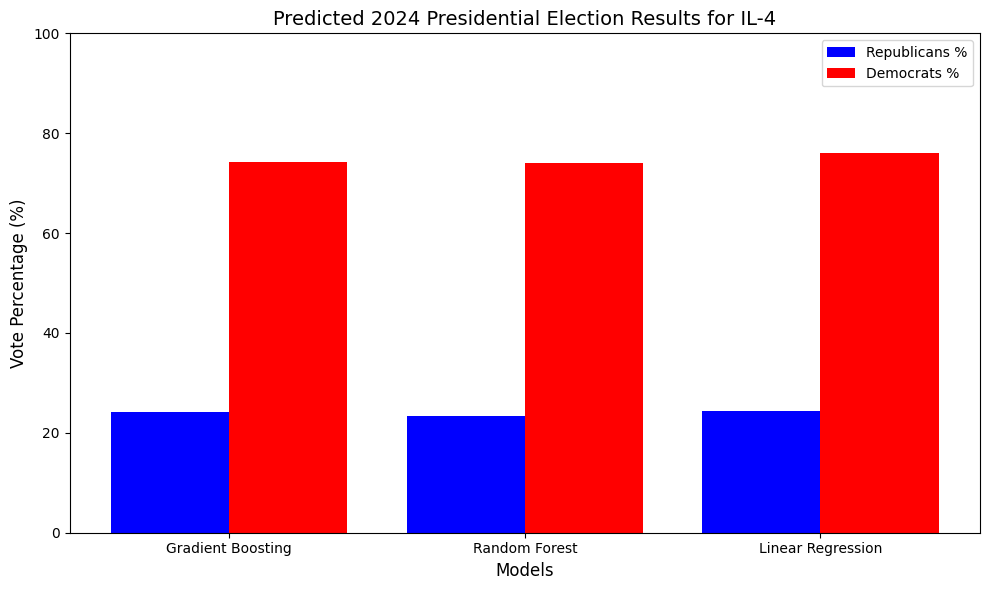

In [ ]:
# Data for visualization
models = ["Gradient Boosting", "Random Forest", "Linear Regression"]
republican_percentages = [24.220875, 23.362000, 24.282899]
democrat_percentages = [74.157062, 74.066000, 76.137108]

# Create a bar width and positions
bar_width = 0.4
x = range(len(models))

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, republican_percentages, bar_width, label="Republicans %", color="blue")
plt.bar([i + bar_width for i in x], democrat_percentages, bar_width, label="Democrats %", color="red")

# Add chart details
plt.title("Predicted 2024 Presidential Election Results for IL-4", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Vote Percentage (%)", fontsize=12)
plt.xticks([i + bar_width / 2 for i in x], models, fontsize=10)
plt.legend(fontsize=10)
plt.ylim(0, 100)

# Display the chart
plt.tight_layout()
plt.show()

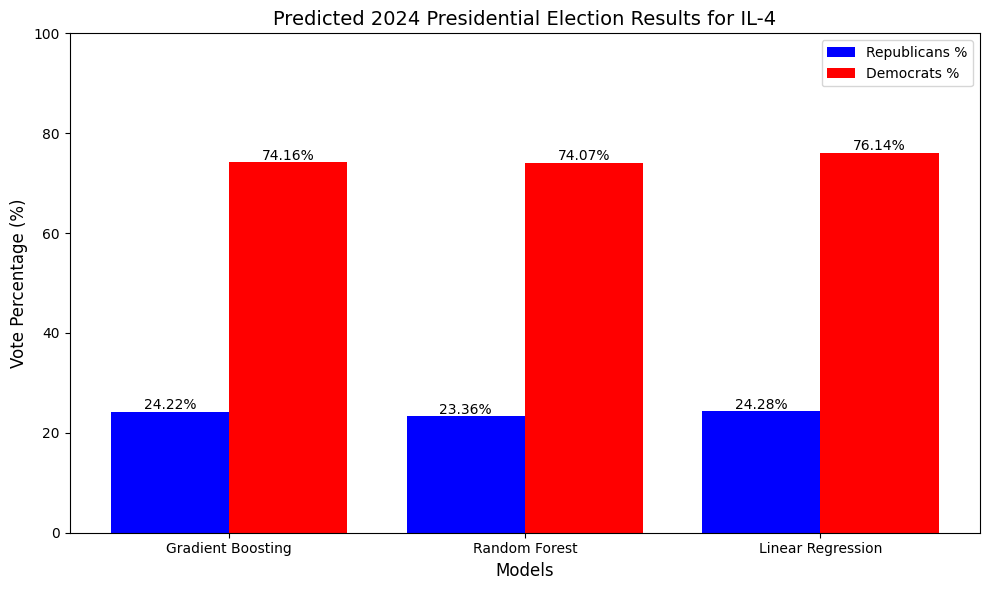

In [ ]:
# Data for visualization
models = ["Gradient Boosting", "Random Forest", "Linear Regression"]
republican_percentages = [24.220875, 23.362000, 24.282899]
democrat_percentages = [74.157062, 74.066000, 76.137108]

# Create a bar width and positions
bar_width = 0.4
x = range(len(models))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars_republican = plt.bar(x, republican_percentages, bar_width, label="Republicans %", color="blue")
bars_democrat = plt.bar([i + bar_width for i in x], democrat_percentages, bar_width, label="Democrats %", color="red")

# Add percentage labels above each bar
for bar in bars_republican:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{bar.get_height():.2f}%", ha='center', fontsize=10)
for bar in bars_democrat:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{bar.get_height():.2f}%", ha='center', fontsize=10)

# Add chart details
plt.title("Predicted 2024 Presidential Election Results for IL-4", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Vote Percentage (%)", fontsize=12)
plt.xticks([i + bar_width / 2 for i in x], models, fontsize=10)
plt.legend(fontsize=10)
plt.ylim(0, 100)

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Create the dataset based on the provided data
district_data = pd.DataFrame({
    "Year": [2012, 2014, 2016, 2018, 2020, 2022, 2024],
    "Total Votes": [160509, 101944, 171297, 166189, 222737, 133047, 223300],
    "Democrats %": [83, 78.10, 100, 86.60, 84.05, 68.42, 64.30],
    "Republicans %": [17, 21.90, 0, 13.40, 15.95, 28.07, 20.60]
})

# Separate features and target variables
train_data = district_data[district_data["Year"] < 2024]
test_data = district_data[district_data["Year"] == 2024]

# Features and targets
X_train = train_data[["Year", "Total Votes"]]
y_train_republican = train_data["Republicans %"]
y_train_democrat = train_data["Democrats %"]

X_test = test_data[["Year", "Total Votes"]]

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store predictions
predictions = {"Model": [], "Republicans %": [], "Democrats %": []}

# Train and predict for each model
for model_name, model in models.items():
    # Train for Republicans
    model.fit(X_train, y_train_republican)
    republican_pred = model.predict(X_test)[0]

    # Train for Democrats
    model.fit(X_train, y_train_democrat)
    democrat_pred = model.predict(X_test)[0]

    # Store predictions
    predictions["Model"].append(model_name)
    predictions["Republicans %"].append(republican_pred)
    predictions["Democrats %"].append(democrat_pred)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Display the predictions
print("Congressional Election Predictions for IL-4 in 2024:")
print(predictions_df)

Congressional Election Predictions for IL-4 in 2024:
               Model  Republicans %  Democrats %
0  Linear Regression      15.393338    83.091060
1      Random Forest      14.448300    81.814100
2  Gradient Boosting      15.950003    84.049982


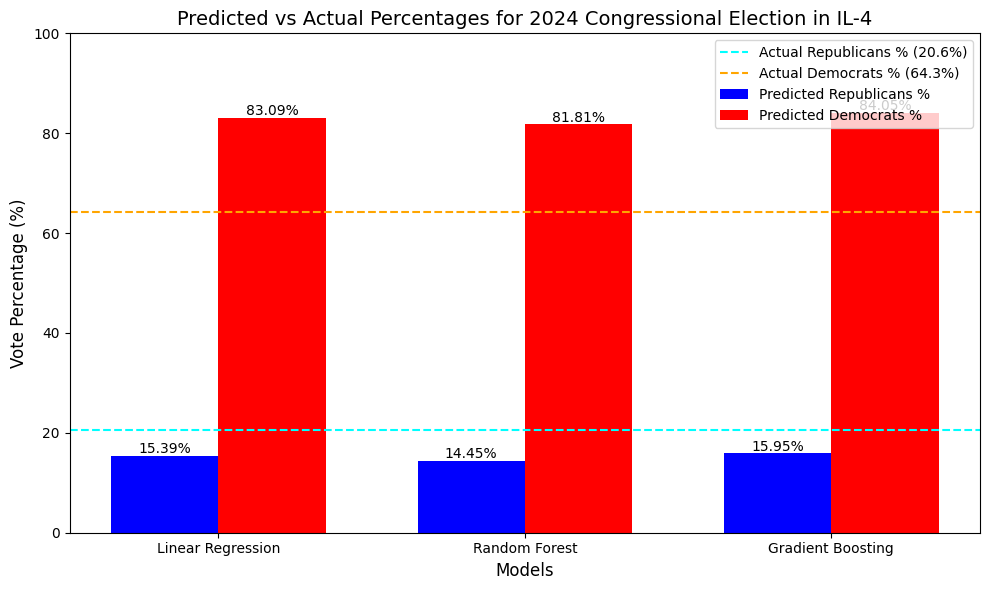

In [ ]:
# Actual percentages for 2024
actual_republicans = 20.60
actual_democrats = 64.30

# Predicted percentages
models = ["Linear Regression", "Random Forest", "Gradient Boosting"]
predicted_republicans = [15.393338, 14.448300, 15.950003]
predicted_democrats = [83.091060, 81.814100, 84.049982]

# Bar width and positions
bar_width = 0.35
x = range(len(models))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars_republicans = plt.bar(x, predicted_republicans, bar_width, label="Predicted Republicans %", color="blue")
bars_democrats = plt.bar([i + bar_width for i in x], predicted_democrats, bar_width, label="Predicted Democrats %", color="red")

# Add actual percentages as horizontal lines
plt.axhline(y=actual_republicans, color='cyan', linestyle='--', linewidth=1.5, label=f"Actual Republicans % ({actual_republicans}%)")
plt.axhline(y=actual_democrats, color='orange', linestyle='--', linewidth=1.5, label=f"Actual Democrats % ({actual_democrats}%)")

# Add percentage labels above each bar
for bar in bars_republicans:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{bar.get_height():.2f}%", ha='center', fontsize=10)
for bar in bars_democrats:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{bar.get_height():.2f}%", ha='center', fontsize=10)

# Add chart details
plt.title("Predicted vs Actual Percentages for 2024 Congressional Election in IL-4", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Vote Percentage (%)", fontsize=12)
plt.xticks([i + bar_width / 2 for i in x], models, fontsize=10)
plt.legend(fontsize=10)
plt.ylim(0, 100)

# Display the chart
plt.tight_layout()
plt.show()

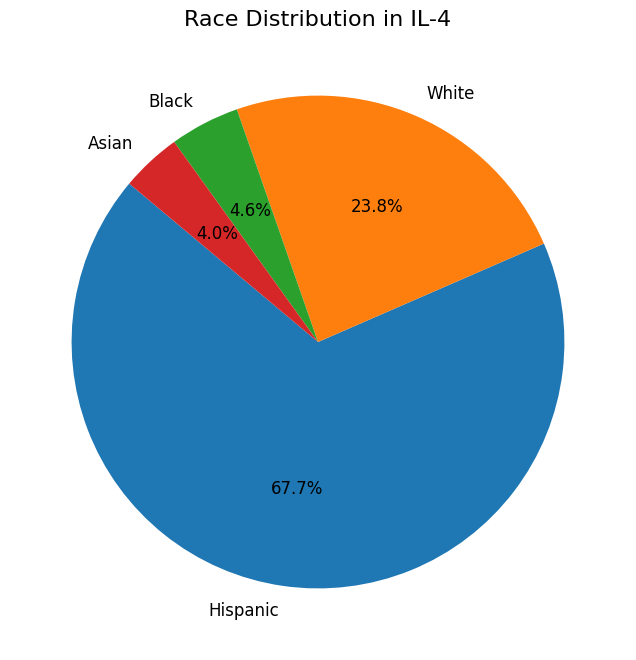

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
races = ["Hispanic", "White", "Black", "Asian"]
percentages = [66.5, 23.4, 4.5, 3.9]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=races, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title("Race Distribution in IL-4", fontsize=16)
plt.show()